In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

if COLAB:
    DATA_PATH = "/content/drive/My Drive/IT/ML_datasets/Many_coins/"
    LIB_PATH = "/content/drive/My Drive/IT/custom_libs/"
else:
    DATA_PATH = "../Datasets/"
    LIB_PATH = "../custom_libs/"

Note: not using Google CoLab


In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

In [3]:
file_name = 'all_data_ETH_USDT.csv'
df_all = pd.read_csv(DATA_PATH + file_name)

In [4]:
df_all

,Unnamed: 0,date,open,high,low,close,volume,plus_di,minus_di,aroonosc,...,rel_dif_sum_9,rel_dif_sum_8,rel_dif_sum_7,rel_dif_sum_6,rel_dif_sum_5,rel_dif_sum_4,rel_dif_sum_3,rel_dif_sum_2,rel_dif_sum_1,rel_dif_sum_0
0,0,2020-03-26 02:45:00+00:00,135.77,136.23,135.69,136.23,1493.61495,18.378889,18.572397,-64.285714,...,-0.000504,-0.003590,-0.004548,-0.003884,-0.004179,-0.007202,-0.002099,-0.001731,-0.003643,-0.000255
1,1,2020-03-26 02:50:00+00:00,136.20,136.28,135.92,135.96,1436.48814,18.134883,17.563094,-64.285714,...,-0.002342,-0.003300,-0.002637,-0.002931,-0.005954,-0.000852,-0.000484,-0.002395,0.000993,-0.000769
2,2,2020-03-26 02:55:00+00:00,135.95,136.23,135.87,136.00,2450.44953,17.132228,17.359952,-64.285714,...,-0.005799,-0.005135,-0.005430,-0.008453,-0.003350,-0.002982,-0.004894,-0.001506,-0.003268,-0.002900
3,3,2020-03-26 03:00:00+00:00,136.00,136.41,136.00,136.32,1604.99295,18.832272,16.257507,42.857143,...,-0.001909,-0.002204,-0.005227,-0.000124,0.000244,-0.001668,0.001720,-0.000042,0.000326,0.002679
4,4,2020-03-26 03:05:00+00:00,136.31,136.40,135.95,136.25,2176.10144,17.517378,15.898178,42.857143,...,-0.002204,-0.005227,-0.000124,0.000244,-0.001668,0.001720,-0.000042,0.000326,0.002679,0.002239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,3131,2020-04-05 23:40:00+00:00,142.54,142.78,142.53,142.77,567.97729,18.297711,19.528262,-50.000000,...,0.000081,-0.001384,-0.002782,-0.002292,-0.005300,-0.003686,-0.004247,-0.005088,-0.004947,-0.003334
3132,3132,2020-04-05 23:45:00+00:00,142.77,142.88,142.65,142.86,319.30617,19.630430,18.494700,-50.000000,...,0.002593,0.001196,0.001686,-0.001322,0.000292,-0.000269,-0.001110,-0.000970,0.000644,0.001274
3133,3133,2020-04-05 23:50:00+00:00,142.86,142.94,142.78,142.85,483.93456,20.311947,17.789341,-50.000000,...,0.000636,0.001126,-0.001882,-0.000269,-0.000829,-0.001670,-0.001530,0.000084,0.000714,0.000644
3134,3134,2020-04-05 23:55:00+00:00,142.89,142.92,142.59,142.68,702.15377,18.725671,20.896489,-50.000000,...,0.001126,-0.001882,-0.000269,-0.000829,-0.001670,-0.001530,0.000084,0.000714,0.000644,-0.000826


In [5]:
# window_size = 15

df_price = df_all[:100][['date', 'close']]
df_price

,date,close
0,2020-03-26 02:45:00+00:00,136.23
1,2020-03-26 02:50:00+00:00,135.96
2,2020-03-26 02:55:00+00:00,136.00
3,2020-03-26 03:00:00+00:00,136.32
4,2020-03-26 03:05:00+00:00,136.25
...,...,...
95,2020-03-26 10:40:00+00:00,135.44
96,2020-03-26 10:45:00+00:00,135.13
97,2020-03-26 10:50:00+00:00,135.05
98,2020-03-26 10:55:00+00:00,135.07


In [6]:
# maxIndex = np.argmax(df_price['close'], axis=0) 
# maxIndex

In [7]:
def get_min_max(df: DataFrame, col_name): 
#     print('Window:', df.index.min(), df.index.max())
    i_start = df.index.min()
    i_end = df.index.max()
#     print(df[col_name])
    i_min = df[col_name].idxmin()
    i_max = df[col_name].idxmax()
#     print('Before None: ', i_min, i_max)
    if i_min == i_start or i_min == i_end: i_min = None
    if i_max == i_start or i_max == i_end: i_max = None
    return i_min, i_max
    

In [8]:
def add_min_max_cols(df: DataFrame, col_name, window_size):
    min_col = f'min_{window_size}'
    max_col = f'max_{window_size}'
    df[min_col] = 0
    df[max_col] = 0
    
    for index, row in df.iterrows():
        df_window = df[index : index + window_size]
        i_min, i_max = get_min_max(df_window, col_name)
#         print(i_min, i_max)
        if i_min: 
            df.loc[i_min, min_col] = 1
        if i_max: 
            df.loc[i_max, max_col] = 1

In [9]:
def add_min_max_sum(df: DataFrame):
    min_prefix = 'min_'
    max_prefix = 'max_'
    df['sum'] = 0
    for col_name in df.columns:
        if min_prefix in col_name:
            df['sum'] -= df[col_name]
        if max_prefix in col_name:
            df['sum'] += df[col_name]
            

In [10]:
add_min_max_cols(df_price, 'close', 5)
add_min_max_cols(df_price, 'close', 8)
add_min_max_cols(df_price, 'close', 13)
add_min_max_cols(df_price, 'close', 21)
add_min_max_cols(df_price, 'close', 34)
add_min_max_sum(df_price)
df_price[:50]

,date,close,min_5,max_5,min_8,max_8,min_13,max_13,min_21,max_21,min_34,max_34,sum
0,2020-03-26 02:45:00+00:00,136.23,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-26 02:50:00+00:00,135.96,1,0,1,0,1,0,1,0,1,0,-5
2,2020-03-26 02:55:00+00:00,136.00,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-26 03:00:00+00:00,136.32,0,1,0,1,0,0,0,0,0,0,2
4,2020-03-26 03:05:00+00:00,136.25,0,0,0,0,0,0,0,0,0,0,0
5,2020-03-26 03:10:00+00:00,136.07,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-26 03:15:00+00:00,136.13,0,0,0,0,0,0,0,0,0,0,0
7,2020-03-26 03:20:00+00:00,136.03,1,0,1,0,1,0,1,0,1,0,-5
8,2020-03-26 03:25:00+00:00,136.10,0,0,0,0,0,0,0,0,0,0,0
9,2020-03-26 03:30:00+00:00,136.96,0,1,0,1,0,1,0,0,0,0,3


In [11]:
df_price2 = df_all[:100][['date', 'close']]
add_min_max_cols(df_price2, 'close', 5)
add_min_max_cols(df_price2, 'close', 10)
add_min_max_cols(df_price2, 'close', 15)
add_min_max_cols(df_price2, 'close', 20)
add_min_max_cols(df_price2, 'close', 25)
add_min_max_sum(df_price2)
df_price2[:50]

,date,close,min_5,max_5,min_10,max_10,min_15,max_15,min_20,max_20,min_25,max_25,sum
0,2020-03-26 02:45:00+00:00,136.23,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-26 02:50:00+00:00,135.96,1,0,1,0,1,0,1,0,1,0,-5
2,2020-03-26 02:55:00+00:00,136.00,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-26 03:00:00+00:00,136.32,0,1,0,0,0,0,0,0,0,0,1
4,2020-03-26 03:05:00+00:00,136.25,0,0,0,0,0,0,0,0,0,0,0
5,2020-03-26 03:10:00+00:00,136.07,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-26 03:15:00+00:00,136.13,0,0,0,0,0,0,0,0,0,0,0
7,2020-03-26 03:20:00+00:00,136.03,1,0,1,0,1,0,1,0,1,0,-5
8,2020-03-26 03:25:00+00:00,136.10,0,0,0,0,0,0,0,0,0,0,0
9,2020-03-26 03:30:00+00:00,136.96,0,1,0,1,0,0,0,0,0,0,2


In [12]:
df_price['sum_2'] = df_price2['sum']
df_price[:50]

,date,close,min_5,max_5,min_8,max_8,min_13,max_13,min_21,max_21,min_34,max_34,sum,sum_2
0,2020-03-26 02:45:00+00:00,136.23,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-26 02:50:00+00:00,135.96,1,0,1,0,1,0,1,0,1,0,-5,-5
2,2020-03-26 02:55:00+00:00,136.00,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-26 03:00:00+00:00,136.32,0,1,0,1,0,0,0,0,0,0,2,1
4,2020-03-26 03:05:00+00:00,136.25,0,0,0,0,0,0,0,0,0,0,0,0
5,2020-03-26 03:10:00+00:00,136.07,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-26 03:15:00+00:00,136.13,0,0,0,0,0,0,0,0,0,0,0,0
7,2020-03-26 03:20:00+00:00,136.03,1,0,1,0,1,0,1,0,1,0,-5,-5
8,2020-03-26 03:25:00+00:00,136.10,0,0,0,0,0,0,0,0,0,0,0,0
9,2020-03-26 03:30:00+00:00,136.96,0,1,0,1,0,1,0,0,0,0,3,2


In [13]:
main_cols = ['date', 'close', 'sum']

In [14]:
df_price3 = df_all[:100][['date', 'close']]
add_min_max_cols(df_price3, 'close', 5)
add_min_max_cols(df_price3, 'close', 8)
add_min_max_cols(df_price3, 'close', 13)
add_min_max_cols(df_price3, 'close', 21)
add_min_max_cols(df_price3, 'close', 34)
add_min_max_cols(df_price3, 'close', 10)
add_min_max_cols(df_price3, 'close', 15)
add_min_max_cols(df_price3, 'close', 20)
add_min_max_cols(df_price3, 'close', 25)
add_min_max_cols(df_price3, 'close', 30)
add_min_max_sum(df_price3)
df_price3[main_cols][:50]

,date,close,sum
0,2020-03-26 02:45:00+00:00,136.23,0
1,2020-03-26 02:50:00+00:00,135.96,-10
2,2020-03-26 02:55:00+00:00,136.00,0
3,2020-03-26 03:00:00+00:00,136.32,2
4,2020-03-26 03:05:00+00:00,136.25,0
5,2020-03-26 03:10:00+00:00,136.07,0
6,2020-03-26 03:15:00+00:00,136.13,0
7,2020-03-26 03:20:00+00:00,136.03,-10
8,2020-03-26 03:25:00+00:00,136.10,0
9,2020-03-26 03:30:00+00:00,136.96,4


In [15]:
df_price4 = df_all[:100][['date', 'close']]
add_min_max_cols(df_price4, 'close', 3)
add_min_max_cols(df_price4, 'close', 5)
add_min_max_cols(df_price4, 'close', 7)
add_min_max_cols(df_price4, 'close', 9)
add_min_max_cols(df_price4, 'close', 11)
add_min_max_cols(df_price4, 'close', 13)
add_min_max_cols(df_price4, 'close', 15)
add_min_max_cols(df_price4, 'close', 17)
add_min_max_cols(df_price4, 'close', 19)
add_min_max_cols(df_price4, 'close', 21)
add_min_max_sum(df_price4)
df_price4[main_cols][:50]

,date,close,sum
0,2020-03-26 02:45:00+00:00,136.23,0
1,2020-03-26 02:50:00+00:00,135.96,-10
2,2020-03-26 02:55:00+00:00,136.00,0
3,2020-03-26 03:00:00+00:00,136.32,4
4,2020-03-26 03:05:00+00:00,136.25,0
5,2020-03-26 03:10:00+00:00,136.07,-1
6,2020-03-26 03:15:00+00:00,136.13,1
7,2020-03-26 03:20:00+00:00,136.03,-10
8,2020-03-26 03:25:00+00:00,136.10,0
9,2020-03-26 03:30:00+00:00,136.96,6


In [16]:
df_price = df_price3[main_cols]
df_price['sum_2'] = df_price4['sum']
df_price[:50]

,date,close,sum,sum_2
0,2020-03-26 02:45:00+00:00,136.23,0,0
1,2020-03-26 02:50:00+00:00,135.96,-10,-10
2,2020-03-26 02:55:00+00:00,136.00,0,0
3,2020-03-26 03:00:00+00:00,136.32,2,4
4,2020-03-26 03:05:00+00:00,136.25,0,0
5,2020-03-26 03:10:00+00:00,136.07,0,-1
6,2020-03-26 03:15:00+00:00,136.13,0,1
7,2020-03-26 03:20:00+00:00,136.03,-10,-10
8,2020-03-26 03:25:00+00:00,136.10,0,0
9,2020-03-26 03:30:00+00:00,136.96,4,6


In [17]:
df_price[50:100]

,date,close,sum,sum_2
50,2020-03-26 06:55:00+00:00,135.11,1,3
51,2020-03-26 07:00:00+00:00,134.58,-5,-8
52,2020-03-26 07:05:00+00:00,134.77,0,0
53,2020-03-26 07:10:00+00:00,135.01,0,0
54,2020-03-26 07:15:00+00:00,135.38,10,10
55,2020-03-26 07:20:00+00:00,135.32,0,0
56,2020-03-26 07:25:00+00:00,135.13,0,0
57,2020-03-26 07:30:00+00:00,135.11,-1,-2
58,2020-03-26 07:35:00+00:00,135.18,7,10
59,2020-03-26 07:40:00+00:00,134.74,0,0


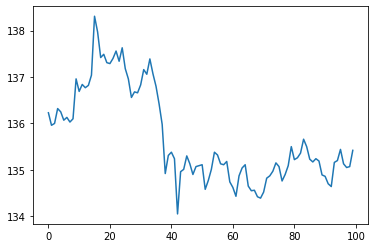

In [18]:
df_price['close'].plot();

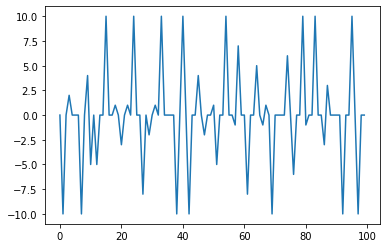

In [19]:
df_price['sum'].plot();

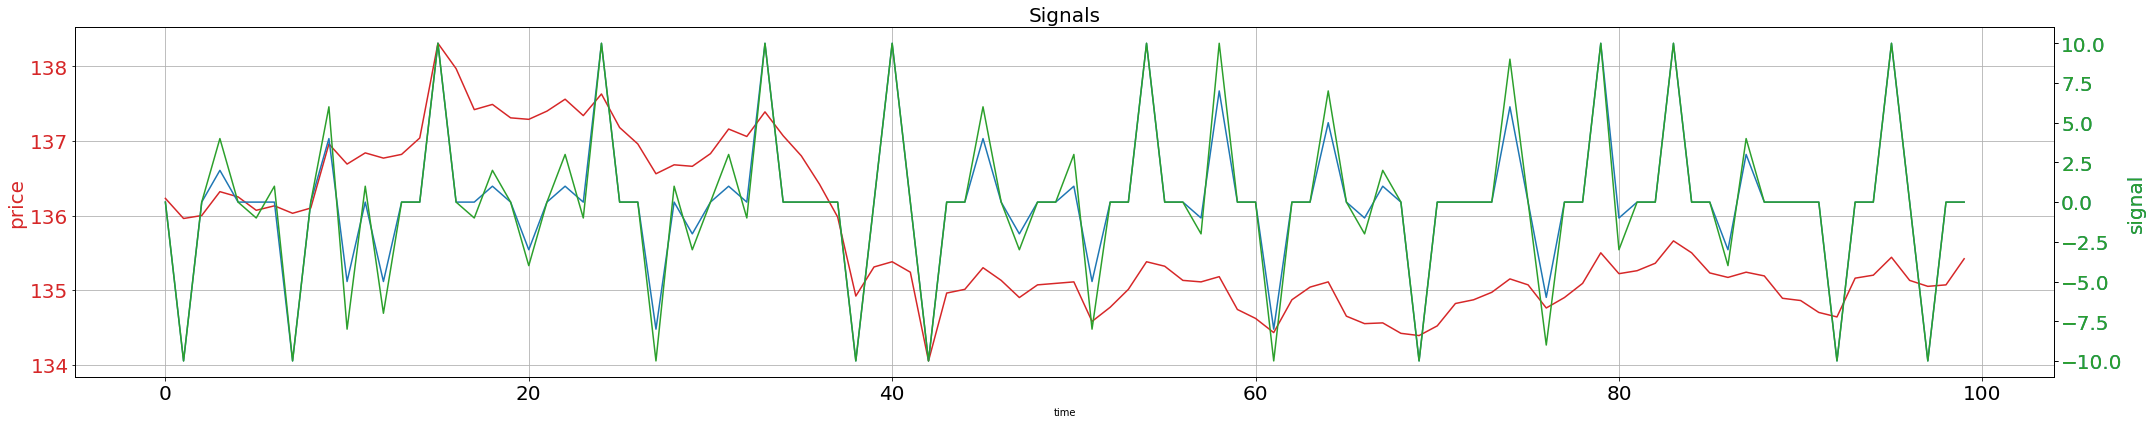

In [23]:
fig, ax1 = plt.subplots(figsize=(30, 6))
plt.title('Signals', fontdict={'fontsize': 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('price', color=color, fontdict={'fontsize': 20})
ax1.plot(df_price.index, df_price['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('signal', color=color, fontdict={'fontsize': 20})  # we already handled the x-label with ax1
ax2.plot(df_price.index, df_price['sum'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize=20)

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax3.set_ylabel('signal', color=color, fontdict={'fontsize': 20})  # we already handled the x-label with ax1
ax3.plot(df_price.index, df_price['sum_2'], color=color)
ax3.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



# plt.plot(df_price.index, df_price['close'])
# plt.scatter(df_price.index, df_price['sum'])